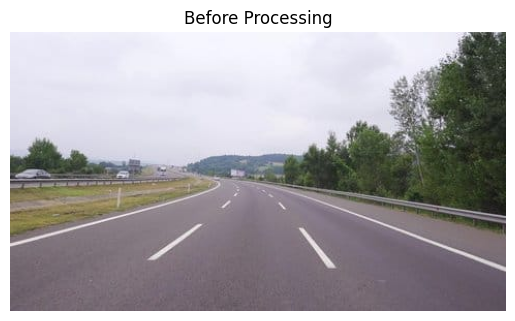

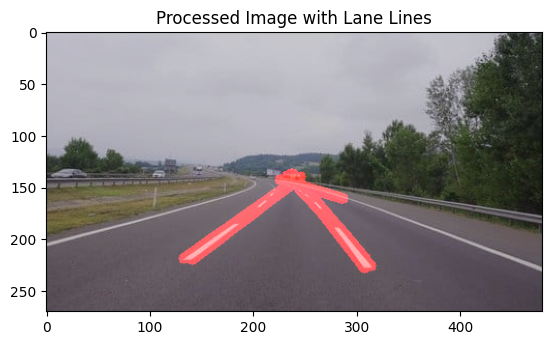

In [8]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import Image

# Display image
Image(filename='road_lane_img.jpg')


# Cropping the region of interest
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

# Draw and complete the line which we detected by HoughLines method
def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    # Change line color to red (BGR format)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1, y1), (x2, y2), (0, 0, 255), thickness=10)  # Red color

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

def process(image):
    # Find out height and width of image
    height = image.shape[0]
    width = image.shape[1]

    # Getting vertices of region of interest (triangle from bottom corners to mid-top)
    region_of_interest_vertices = [(0, height), (width / 2, height / 2), (width, height)]

    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Detect edges using Canny edge detector
    edge_image = cv2.Canny(gray_image, 100, 120)

    # Crop the image to region of interest
    cropped_img = region_of_interest(
        edge_image, np.array([region_of_interest_vertices], np.int32)
    )

    # Detect lines using Hough Transform
    lines = cv2.HoughLinesP(
        cropped_img,
        rho=2,
        theta=np.pi / 180,
        threshold=50,
        lines=np.array([]),
        minLineLength=40,
        maxLineGap=100
    )

    # Draw lines on the original image
    image_lines = draw_the_lines(image, lines)
    return image_lines
import matplotlib.pyplot as plt
import cv2

# Read the images
image1 = cv2.imread('road_lane_img.jpg')

# Convert BGR to RGB for proper display in matplotlib
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)


# Then display the first image
plt.imshow(image1_rgb)
plt.title('Before Processing')
plt.axis('off')
plt.show()

# For processing an image
image = cv2.imread('road_lane_img.jpg')  # Input image file
if image is None:
    print("Image not loaded properly!")
else:
    processed_image = process(image)
    # Display the processed image
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.title('Processed Image with Lane Lines')
    plt.show()
from IPython.display import Video
Video("test2.mp4")
